# Dimensionality Reduction

The data used for dimensionality reduction is MNIST dataset which contains 28X28 pixels images of hand written digits and it's corresponding label ranging from 0-9. The dataset has 42K training records.

As a part of dimensionality reduction exercise we will performing PCA and t-SNE on this dataset.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read training data and print it's head records.
train_data = pd.read_csv('mnist_train.csv')
print(train_data.head(5))

#store labels to a different variable and drop it from train_dataset

labels = train_data['label']
train_data = train_data.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [48]:
print("Dimension of training data:",train_data.shape)
print("Dimension of labels:", labels.shape)

Dimension of training data: (42000, 784)
Dimension of labels: (42000,)


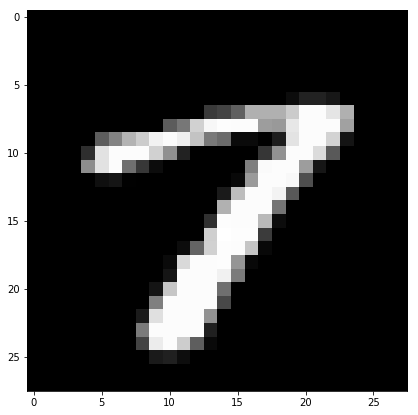

7


In [49]:
# plot a sample from dataset

plt.figure(figsize=(7,7))
index = 3000

grid_data = train_data.iloc[index].values.reshape(28,28) #convert 1D to 2D array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

#print corresponding label
print(labels[3000])


# Dimensionality Reduction using PCA

In [50]:
# STEP 1: Date pre-processing: Column Standardization

sample_data = train_data.head(15000)
sample_labels = labels.head(15000)

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(sample_data)
print('Shape of standardized data:',standardized_data.shape)

C:\Users\danush.gokul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Shape of standardized data: (15000, 784)


C:\Users\danush.gokul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
# STEP 2: Calculate co-variance matrix

covariance_matrix = np.matmul(standardized_data.T,standardized_data)
print('Shape of covariance matrix:',covariance_matrix.shape)

Shape of covariance matrix: (784, 784)


In [52]:
# STEP 3: Calculate eigen values and eigen vectors

from scipy.linalg import eigh

# eigh returns eigen values in ascending order and we require top 2 eigen values to transform data to 2D
eigen_values, eigen_vectors = eigh(covariance_matrix, eigvals=(782,783))

print("Shape of eigen vectors:",eigen_vectors.shape)

# Transposing eigen vectors for easier calculation

eigen_vectors = eigen_vectors.T

Shape of eigen vectors: (784, 2)


In [53]:
# STEP 4: Reduce dimension of data to 2D by performing eigen_vector * train_data.T
new_cordinates = np.matmul(eigen_vectors, standardized_data.T)
print("Shape of new cordinates:", new_cordinates.shape)

Shape of new cordinates: (2, 15000)


In [54]:
# Append labels to the 2D projected data
import pandas as pd

new_cordinates = np.vstack((new_cordinates,sample_labels)).T

#Create new dataframe to plot the result
data = pd.DataFrame(data=new_cordinates,columns=('1st Principle', '2nd Principle', 'Label'))
print(data.head())

   1st Principle  2nd Principle  Label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\danush.gokul\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


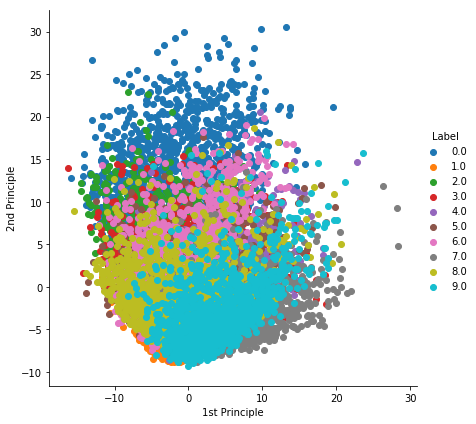

In [55]:
#Plotting the result with seaborn
import seaborn as sn
sn.FacetGrid(data,hue='Label',size =6).map(plt.scatter,'1st Principle', '2nd Principle').add_legend()
plt.show()

# PCA using scikit-learn 

In [56]:
# Initialize PCA
from sklearn import decomposition

pca = decomposition.PCA()

#configure parameters and fit data

pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

print('Shape of PCA reduced data',pca_data.shape)

Shape of PCA reduced data (15000, 2)


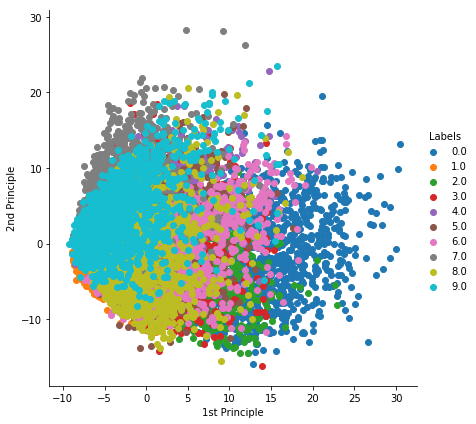

In [57]:
# Plotting the results

pca_data = np.vstack((pca_data.T,sample_labels)).T

data = pd.DataFrame(pca_data,columns=('1st Principle', '2nd Principle', 'Labels'))
sn.FacetGrid(data, hue='Labels',height=6).map(plt.scatter,'1st Principle','2nd Principle').add_legend()
plt.show()

# PCA for dimensionality reduction (not for visualization) 

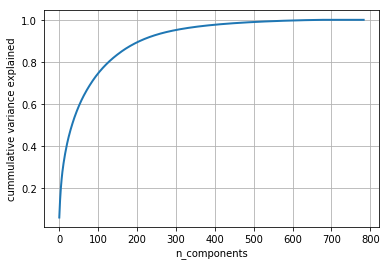

In [58]:
# The eigen values describes the variance factor and we want to reduce dimensions to a value d such that
# cum_sum(lambda_1 to lamba_d)/sum(all lambda) is atleast 90 percent

pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

# Calculate lambda / sum(all lambda) for each value
percent_variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

# Now, calculate cummulative sum
cummulative_variance_explained = np.cumsum(percent_variance_explained)

# PLot the result
plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cummulative_variance_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative variance explained')
plt.show()

We could see from the graph that d ~ 350 gives about 95 percent of variance and rest contributes to only 5 percent of variance 
and this could be avoided 

# t-SNE using Scikit-Learn 

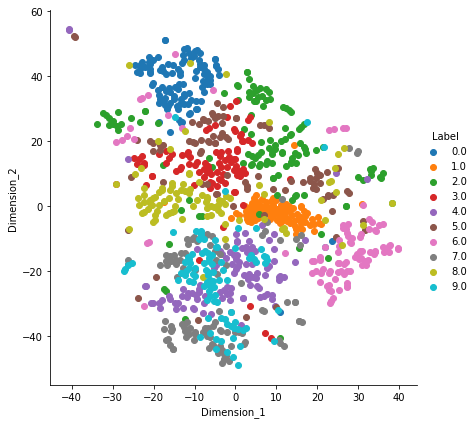

In [60]:
# Reducing input to avoid computational overhead

tsne_input = standardized_data[:1000,:]
tsne_label = labels[:1000]

from sklearn.manifold import TSNE

model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
# Configuring the parameters
# Random state is mentioned to get a stable result as we change parameters, since t-SNE is a randomized algorithm
# Default value of perplexity is 30
# Default value of number of iterations is 1000
# Perplexity and n_iteration are the important parameters of t-SNE
# Default learning rate is 200

tsne_data = model.fit_transform(tsne_input)

tsne_data = np.vstack((tsne_data.T, tsne_label)).T
tsne_df = pd.DataFrame(tsne_data, columns = ('Dimension_1', 'Dimension_2', 'Label'))

sn.FacetGrid(tsne_df,hue = 'Label', height=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.show()